In [ ]:
pip install word2number

In [ ]:
pip install sklearn.externals.joblib

In [ ]:
pip install sklearn.LabelEncoder

## BASICS


output= model(x_test)
print(output[4])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n


In [ ]:
reg= linear_model.LinearRegression()


In [ ]:
df= pd.read_csv("my_file.csv")

In [ ]:
df.sample(7
          )

,Bedrooms,Price
4,5,28
2,3,18
3,4,23
5,6,33
1,2,13
6,20,103
7,38,193


In [ ]:
df.Bedrooms

0     1
1     2
2     3
3     4
4     5
5     6
6    20
7    38
Name: Bedrooms, dtype: int64

In [ ]:
reg.fit(df[["Bedrooms"]], df.Price)

LinearRegression()

In [ ]:
reg.predict([[3000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15003.])

In [ ]:
pred= pd.read_csv("my_file_predict.csv")
pred.head()

,Bedrooms
0,3000
1,4000
2,5000
3,6000
4,700


In [ ]:
df1= pd.read_csv("exercise.csv")


In [ ]:
df1.head(10)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
df1.experience= df1.experience.fillna("zero")

In [ ]:
df1.isna().any()

experience                    False
test_score(out of 10)          True
interview_score(out of 10)    False
salary($)                     False
dtype: bool

In [ ]:
score_median= df1["test_score(out of 10)"].median()
score_median

8.0

In [ ]:
df1["test_score(out of 10)"]= df1["test_score(out of 10)"].fillna(score_median)

In [ ]:
df1.head(10)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
df1.isna().any()


experience                    False
test_score(out of 10)         False
interview_score(out of 10)    False
salary($)                     False
dtype: bool

In [ ]:
df1.experience


0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

### Word To Number


In [ ]:
df1.experience= df1.experience.apply(w2n.word_to_num)

In [ ]:
df1.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000


In [ ]:
n_reg= linear_model.LinearRegression()

In [ ]:
n_reg.fit(df1[["experience","test_score(out of 10)","interview_score(out of 10)"]], df1["salary($)"])

LinearRegression()

In [ ]:
n_reg.predict([[2,9,6]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [ ]:
def gradient_descent(X,Y):
  iterations = 1000
  m_curr= c_curr= 0
  learning_rate= 0.01
  n= len(X)
  for i in range(iterations):
    y_predicted= m_curr * X + c_curr
    md = -(2/n) * sum(X * (Y- y_predicted))
    cd= -(2/n) * sum( Y- y_predicted)
    m_curr = m_curr - learning_rate * md
    c_curr= c_curr- learning_rate * cd
    print("m {} ,c {} ,Iteration {}".format(m_curr, c_curr, i+1))
  print("Final Value of M={} and C={}is ".format(m_curr, c_curr))

# Y= 3*X + 1
X= np.array([1,2,3,4,5,6])
Y= np.array([4,7,10,13,16,19])
gradient_descent(X,Y)


### Joblib is a library of sklearn used to save and load models.

In [ ]:
import joblib
joblib.dump(reg,'filename')

['filename']

In [ ]:
model1= joblib.load("filename")

In [ ]:
model1.predict([[4000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20003.])

In [ ]:
df2= pd.read_csv("myfile__.csv")


In [ ]:
df2.head()

,Gender,Age,Salary
0,Male,12,12000
1,Female,14,14000
2,Male,16,17000
3,Female,13,18000
4,Male,18,80000


In [ ]:
df2['gender1']= df2['Gender'].map({'Male':0 , 'Female':1})


In [ ]:
df2.head()

,Gender,Age,Salary,gender1
0,Male,12,12000,NaN
1,Female,14,14000,1.0
2,Male,16,17000,NaN
3,Female,13,18000,1.0
4,Male,18,80000,NaN


In [ ]:
df2['gender1']=df2['gender1'].fillna(0)

In [ ]:
df2.head()

,Gender,Age,Salary,gender1
0,Male,12,12000,0.0
1,Female,14,14000,1.0
2,Male,16,17000,0.0
3,Female,13,18000,1.0
4,Male,18,80000,0.0


In [ ]:
reg1= linear_model.LinearRegression()

In [ ]:
reg1.fit(df2[["Age","gender1"]], df2["Salary"])

LinearRegression()

In [ ]:
reg1.predict([[12,0]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20504.49765808])

In [ ]:
hp= pd.read_csv("houseprices.csv")

In [ ]:
hp.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [ ]:
# Dummies
new=pd.get_dummies(hp.town)
new

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [ ]:
merged= pd.concat([hp,new],axis="columns")
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


### Using Label Encoder


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()


In [ ]:
hp1=hp
hp1.town= le.fit_transform(hp1.town)
hp1

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [ ]:
X= hp1[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [ ]:
Y= hp1.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

### One Hot Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()

In [ ]:
ohe.fit_transform(X).toarray()

array([[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [ ]:
cp= pd.read_csv("carprices.csv")
cp

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


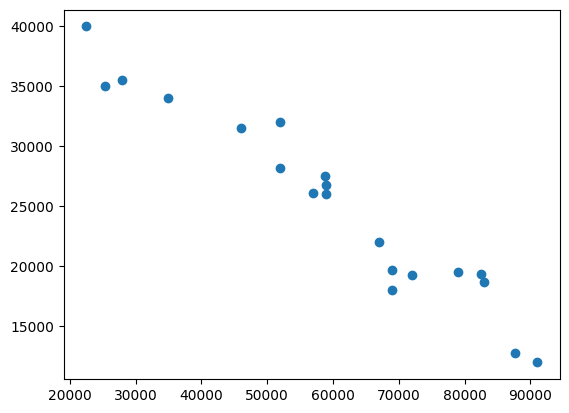

In [ ]:
plt.scatter(cp['Mileage'],cp['Sell Price($)'])
# Linear Relationship

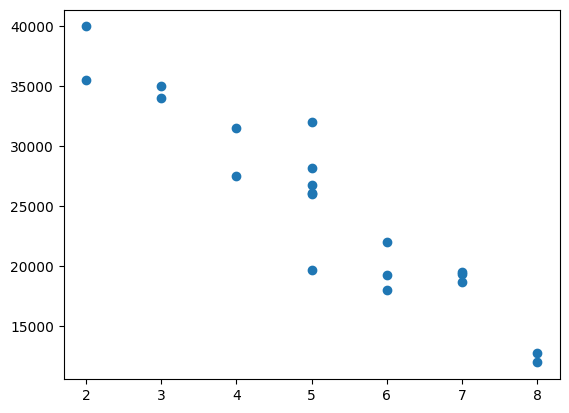

In [ ]:
plt.scatter(cp['Age(yrs)'],cp['Sell Price($)'])
# Linear Relationship

In [ ]:
X= cp[['Age(yrs)','Mileage']]
Y= cp['Sell Price($)']


In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y= train_test_split(X,Y,test_size= 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(train_X, train_Y)

LinearRegression()

In [ ]:
model.score(test_X, test_Y)

0.9202517078098833

## Logistic Regression

In [ ]:
data= pd.read_csv("insurance_data.csv")
data.head()



,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Here passing age as 2D array , because features are passed as a multidimensional tensor.
X_train, X_test, Y_train, Y_test= train_test_split(data[['age']],data.bought_insurance,test_size= 0.1)


In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
model.score(X_test,Y_test)
# 100% accuracy

1.0

## Multiclass Classification

### Digits Dataset

In [ ]:
# This dataset contains 1727 grayscale images of digits of size 8x8 .
# So each image has a feature vector of size 64.
from sklearn.datasets import load_digits


In [ ]:
digits= load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]
# Each image is a feature vector of length 64.

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

6


<Figure size 640x480 with 0 Axes>

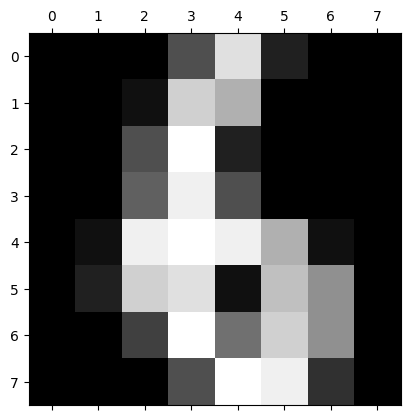

In [ ]:
# Visulaize the image
plt.gray()
plt.matshow(digits.images[34])
print(digits.target[34])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y , test_y= train_test_split(digits.data, digits.target, test_size= 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model= LogisticRegression()

In [ ]:
model.fit(train_x, train_y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(test_x, test_y)

0.9583333333333334

4


<Figure size 640x480 with 0 Axes>

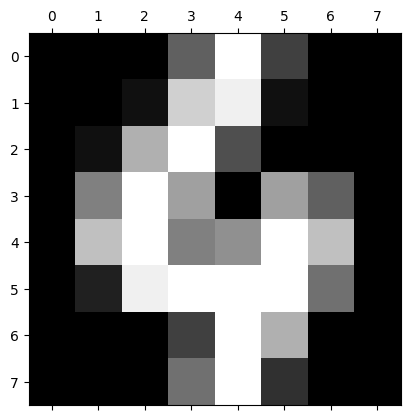

In [ ]:
plt.gray()
plt.matshow(digits.images[64])
print(digits.target[64])

In [ ]:
model.predict([digits.data[64]])

array([4])

#### Confusion Matrix

In [ ]:
y_predicted= model.predict(test_x)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 36,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  2],
       [ 0,  5,  0,  0,  0,  0,  1,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 30]])

Text(95.72222222222221, 0.5, 'Actual')

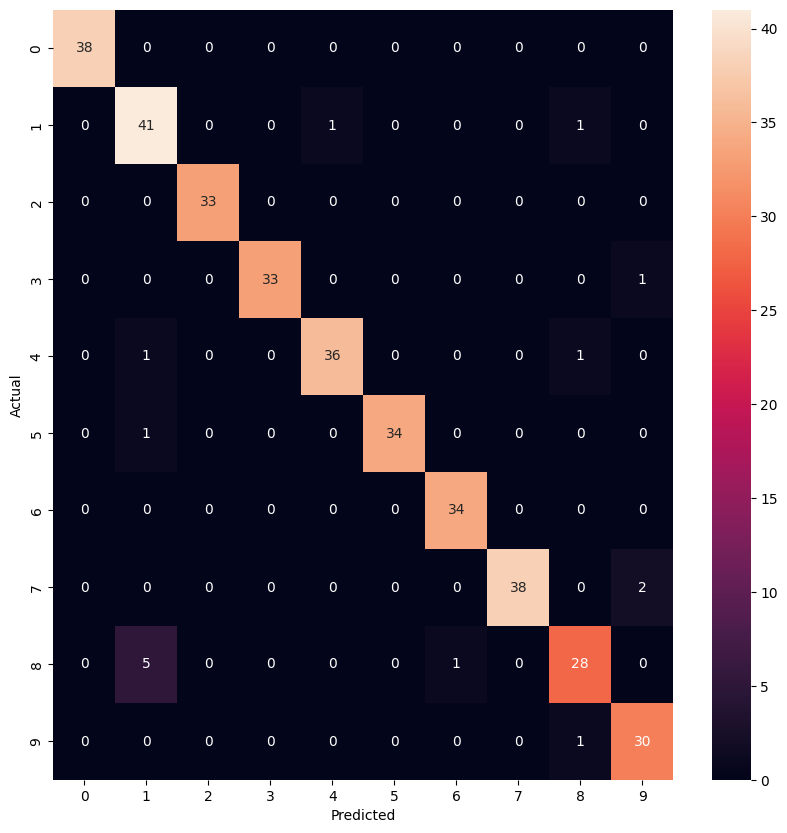

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm,annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Iris Dataset

In [ ]:
from sklearn.datasets import load_iris
iris= load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y= train_test_split(iris.data, iris.target,test_size=0.2)

In [ ]:
test_y.shape

(30,)

In [ ]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()


In [ ]:
log.fit(train_x, train_y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log.score(test_x, test_y)

1.0

#### Confusion Matrix

In [ ]:
# Plot Confusion Matrix
y_predicted = log.predict(test_x)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(test_y, y_predicted)
cm

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 12]])

Text(95.72222222222221, 0.5, 'Actual')

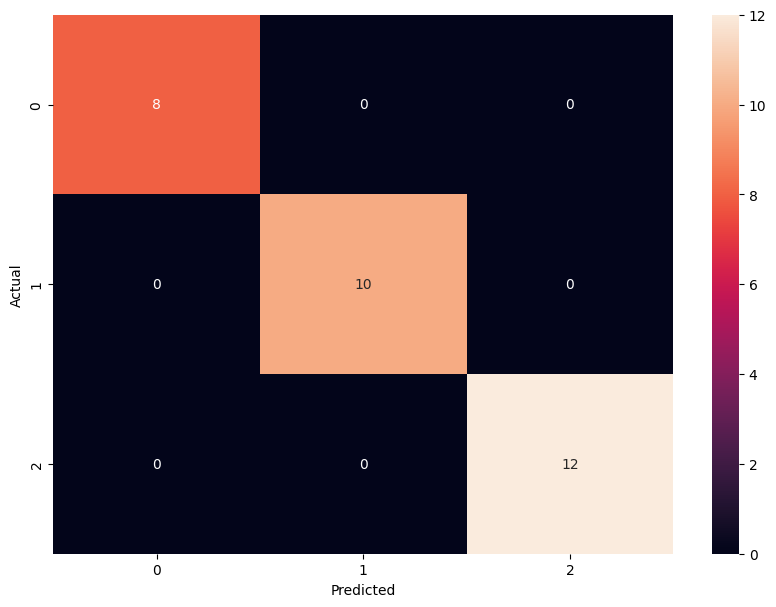

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

## Decision Trees
They are algorithms which is used to solve complicated classification problems by generating multiple decision boundaries.
It works by applying multiple conditionals to the data in order to separate.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
from sklearn import tree
model= tree.DecisionTreeClassifier()

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()

In [ ]:
sl= pd.read_csv('salaries.csv')
sl.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_company= LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [ ]:
sl['company_n']= le_company.fit_transform(sl['company'])
sl['job_n']= le_job.fit_transform(sl['job'])
sl['degree_n']= le_degree.fit_transform(sl['degree'])



In [ ]:
sl.head()

,company,job,degree,salary_more_then_100k,company_n,job_n,degree_n
0,google,sales executive,bachelors,0,2,2,0
1,google,sales executive,masters,0,2,2,1
2,google,business manager,bachelors,1,2,0,0
3,google,business manager,masters,1,2,0,1
4,google,computer programmer,bachelors,0,2,1,0


In [ ]:
sl.drop(['company','job','degree'], axis='columns')

,salary_more_then_100k,company_n,job_n,degree_n
0,0,2,2,0
1,0,2,2,1
2,1,2,0,0
3,1,2,0,1
4,0,2,1,0
5,1,2,1,1
6,0,0,2,1
7,0,0,1,0
8,0,0,0,0
9,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y,test_y =train_test_split(sl[['company_n','job_n','degree_n']], sl['salary_more_then_100k'], test_size= 0.2)

In [ ]:
model.fit(train_x, train_y)

DecisionTreeClassifier()

In [ ]:
model.score(test_x, test_y)

0.5

## Support Vector Machines
This is a highly efficient classification algorithm which aims at Maximising the margin i.e maximizing the distance of the possible classsification hyperplanes or lines from the nearby points.

In [ ]:
from sklearn.datasets import load_iris
iris= load_iris()


In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.target.shape

(150,)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df= pd.DataFrame(iris.data, columns= iris.feature_names)


In [ ]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df0= df[df.target==0]
df1= df[df.target==1]
df2= df[df.target==2]
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [ ]:
%matplotlib inline


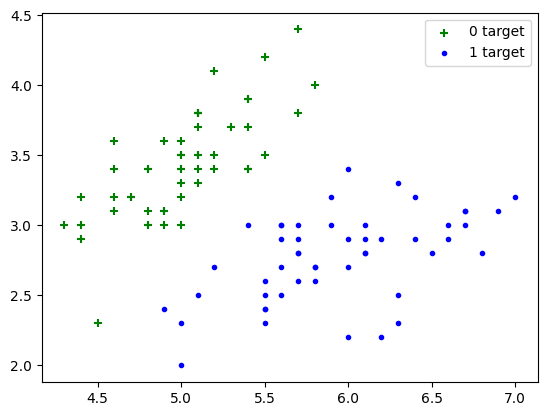

In [ ]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color= 'green', marker='+', label="0 target")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color= 'blue', marker='.',  label="1 target")
# plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color= 'yellow', label="2 target")
plt.legend()
plt.show()

In [ ]:
X= df.drop(['target'], axis= 'columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
Y= df.target
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(X, Y, test_size= 0.2)


In [ ]:
from sklearn.svm import SVC
model= SVC()

In [ ]:
# Training the model
model.fit(x_train,y_train)

SVC()

In [ ]:
model.score(x_test, y_test)

0.9666666666666667

In [ ]:
### Digits Dataset
from sklearn.datasets import load_digits
digits= load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

4


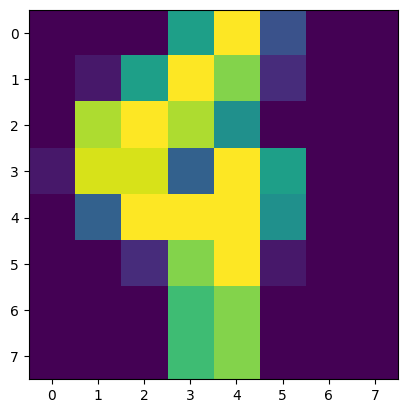

In [ ]:

plt.imshow(digits.images[87])
print(digits.target[87])
plt.show()

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train ,y_test= train_test_split(digits.data, digits.target, test_size=0.2)


In [ ]:
from sklearn.svm import SVC
model1= SVC()

In [ ]:
model1.fit(x_train, y_train)


SVC()

In [ ]:
model1.score(x_test, y_test)

0.9888888888888889

In [ ]:
y_predicted= model1.predict(x_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix( y_test,y_predicted )
cm


array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 40]])

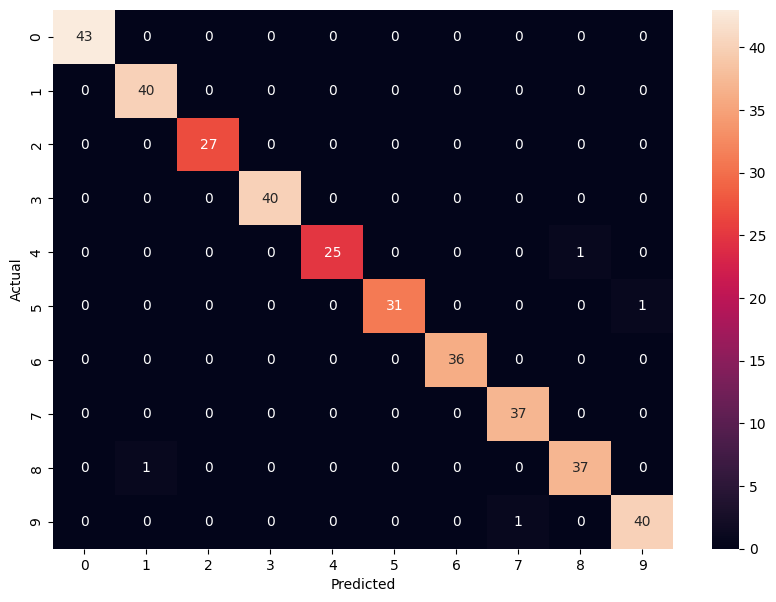

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Random Forest
This type of an alogrithm uses multiple decision trees as estimators, and gives out the result as the majority of the result given by those decision trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2= RandomForestClassifier(n_estimators= 33)

In [ ]:
model2.fit(x_train, y_train)

RandomForestClassifier(n_estimators=33)

In [ ]:
model2.score(x_test, y_test)

0.9722222222222222

In [ ]:
acc= []
max=0
for i in range(100):
  model2= RandomForestClassifier(n_estimators=i+1)
  model2.fit(x_train,y_train)
  acc.append(model2.score(x_test,y_test))
  if(acc[i]> max):
    max= acc[i]
    j=i



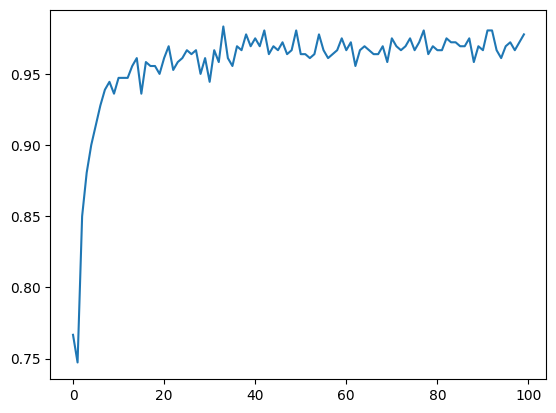

In [ ]:
plt.plot(acc)


In [ ]:
print(j)


33


### Wine dataset

In [ ]:
from sklearn.datasets import load_wine
wine= load_wine()

In [ ]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                          1.36  3.23    2.36  0.27\

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y=  train_test_split(wine.data, wine.target, test_size= 0.2)


In [ ]:
test_x.shape

(36, 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators= 40)

In [ ]:
rfc.fit(train_x, train_y)

RandomForestClassifier(n_estimators=40)

In [ ]:
rfc.score(test_x, test_y)

1.0

## K Fold Cross Validation
This technique takes the average accuracy of multiple iterations to solve the same problem.

In [ ]:
!pip install sklearn.model_selection.StratifiedFold

In [ ]:
from sklearn.datasets import load_digits
digit= load_digits()


In [ ]:
from sklearn.model_selection import KFold
f= KFold (n_splits= 3)

In [ ]:
for a,b in f.split([1,2,3,4,5,6]):
  print(a,b)

[2 3 4 5] [0 1]
[0 1 4 5] [2 3]
[0 1 2 3] [4 5]


In [ ]:
train_x.shape

(1257, 64)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def get_score(model, train_x, test_x, train_y , test_y):
  model.fit(train_x, train_y)
  return model.score(test_x, test_y)

In [ ]:
score_log= []
score_svc=[]
score_rfc= []
for a,b in f.split(list(digit.data)):
  train_x, test_x, train_y , test_y = digit.data[a], digit.data[b], digit.target[a], digit.target[b]
  score_log.append(get_score(LogisticRegression(),train_x, test_x, train_y , test_y ))
  score_svc.append(get_score(SVC(),train_x, test_x, train_y , test_y ))
  score_rfc.append(get_score(RandomForestClassifier(),train_x, test_x, train_y , test_y ))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print("Logistic regression",score_log)
print("Support vector classifiers",score_svc)
print("Random Forest",score_rfc)

Logistic regression [0.9232053422370617, 0.9415692821368948, 0.9148580968280468]
Support vector classifiers [0.9666110183639399, 0.9816360601001669, 0.9549248747913188]
Random Forest [0.9348914858096828, 0.9515859766277128, 0.9232053422370617]


In [ ]:
# Using sklearn API for auto cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),digit.data, digit.target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [ ]:
cross_val_score(SVC(),digit.data, digit.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [ ]:
cross_val_score(RandomForestClassifier(),digit.data, digit.target)

array([0.93333333, 0.91388889, 0.95264624, 0.96657382, 0.92479109])

# Clustering

## K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df= pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


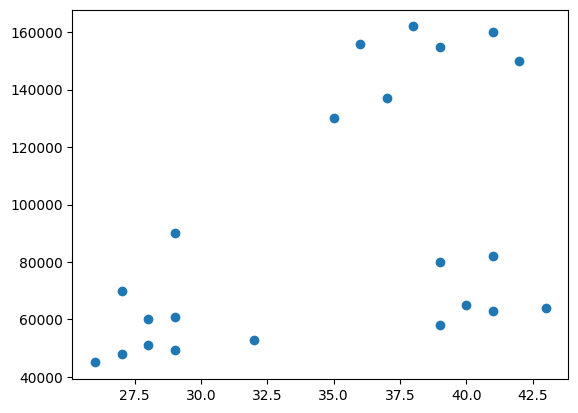

In [ ]:
plt.scatter(df['Age'], df['Income($)'])

In [ ]:
km= KMeans(n_clusters= 3)

In [ ]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [ ]:
df['cluster']= y_predicted


In [ ]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


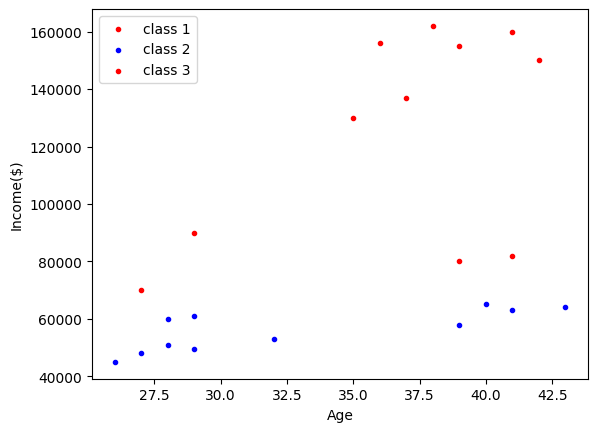

In [ ]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],marker='.',color= "red" ,label = "class 1")
plt.scatter(df2.Age,df2['Income($)'],marker='.',color= "blue" ,label = "class 2")
plt.scatter(df3.Age,df3['Income($)'], marker='.',color= "red",label = "class 3")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()
# As we can see the clusters formed arent perfect. This is because our data is not scaled properly. Y axis has a very high range
# whereas x-axis has a very narrow range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
df['Income($)']= scaler.fit_transform(df[['Income($)']])

In [ ]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0


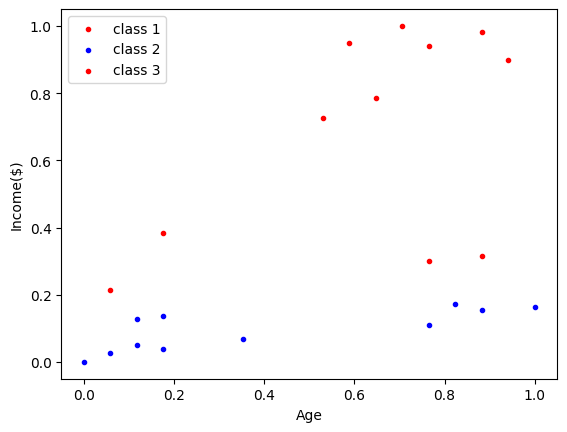

In [ ]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],marker='.',color= "red" ,label = "class 1")
plt.scatter(df2.Age,df2['Income($)'],marker='.',color= "blue" ,label = "class 2")
plt.scatter(df3.Age,df3['Income($)'], marker='.',color= "red",label = "class 3")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [ ]:
df['Age']= scaler.fit_transform(df[['Age']])

In [ ]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['cluster']= y_predicted

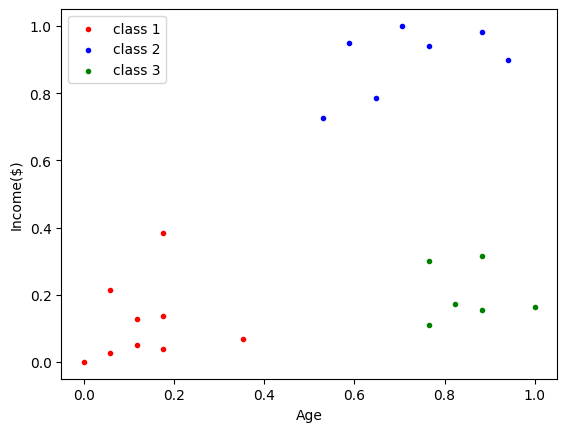

In [ ]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],marker='.',color= "red" ,label = "class 1")
plt.scatter(df2.Age,df2['Income($)'],marker='.',color= "blue" ,label = "class 2")
plt.scatter(df3.Age,df3['Income($)'], marker='.',color= "green",label = "class 3")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

## Hierarchical Clustering
A different kind of clustering which works on the principle of euclidean distance, but the approach is very different from K-Means.


The optimum number of clusters can be found by finding the longest vertical line that does not cross any extended horizontal Line in a dendogram.
The number of points of intersection of a horizontal line through the vertical line found above gives the optimum number of clusters formed.

### Visualizing The data

In [ ]:
cust= pd.read_csv("Mall_Customers.csv")
cust.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


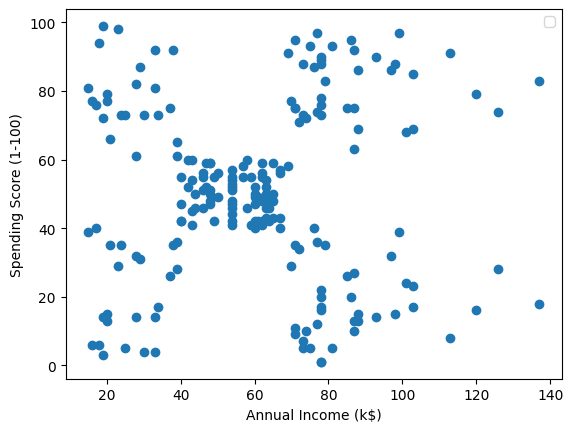

In [ ]:
plt.scatter(cust['Annual Income (k$)'],cust['Spending Score (1-100)'] )
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
cust['Annual Income (k$)']= scaler.fit_transform(cust[['Annual Income (k$)']])
cust['Spending Score (1-100)'] =scaler.fit_transform(cust[['Spending Score (1-100)']] )
cust.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


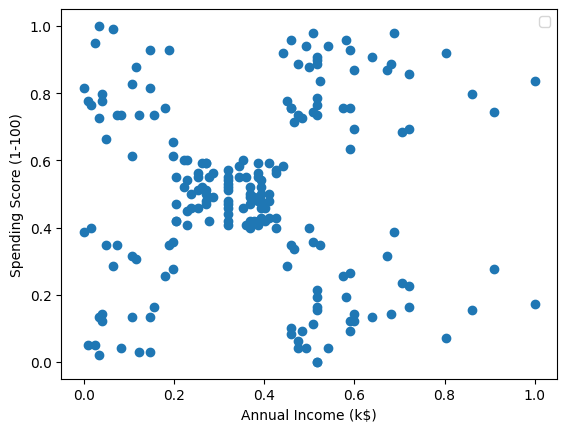

In [ ]:
plt.scatter(cust['Annual Income (k$)'],cust['Spending Score (1-100)'] )
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.legend()
plt.show()

In [ ]:
X = cust.iloc[:,[3,4]].values


### Using the dendrogram to find the optimum number of clusters

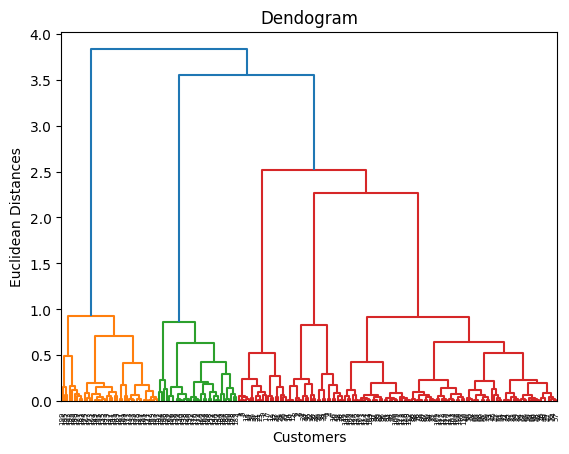

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(X, method= "ward")) # Ward- Method of minimum variance between clusters.
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

### Training the hierarchical clustering model on the dataset.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters= 5, affinity='euclidean', linkage='ward')

In [ ]:
y_hc= hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

### Printing out the result of the model.

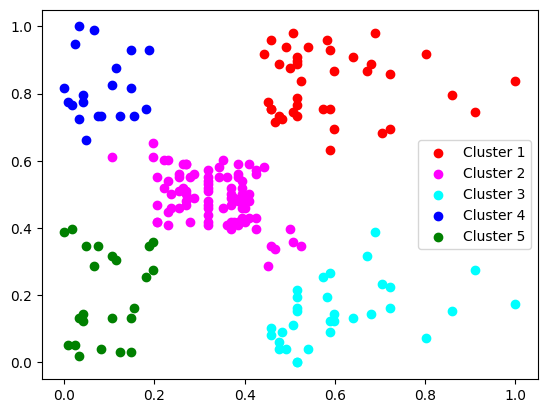

In [ ]:
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], color= 'red', label= 'Cluster 1')
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], color= 'magenta', label= 'Cluster 2')
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], color= 'cyan', label= 'Cluster 3')
plt.scatter(X[y_hc==3,0], X[y_hc==3,1], color= 'blue', label= 'Cluster 4')
plt.scatter(X[y_hc==4,0], X[y_hc==4,1], color= 'green', label= 'Cluster 5')
plt.legend()

# Classification

## Naive Bayes Classifier

In [ ]:
tita= pd.read_csv("titanic.csv")
tita.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
tita.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns',inplace= True )
tita.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
inputs= tita.drop(['Survived'], axis= 'columns')
inputs.head(3)

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250


In [ ]:
Y = tita['Survived']
Y.head(
)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
inputs= pd.concat([inputs, dummies], axis= 'columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [ ]:
inputs.drop("Sex", axis='columns', inplace = True)
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


### To check if their are any Null Values In any of the columns.

In [ ]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

### To fill the Null values if present

In [ ]:
inputs.Age= inputs.Age.fillna(inputs.Age.mean())
inputs.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

### To print number of null values in each column

In [ ]:
inputs.isna().sum()

In [ ]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Creating the model and training the data

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y= train_test_split(inputs, Y , test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()

In [ ]:
nb.fit(train_x, train_y)

GaussianNB()

In [ ]:
nb.score(test_x, test_y)

0.7988826815642458

### Plotting the confusion matrix.

In [ ]:
y_predicted = nb.predict(test_x)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_predicted)
cm

array([[94, 15],
       [21, 49]])

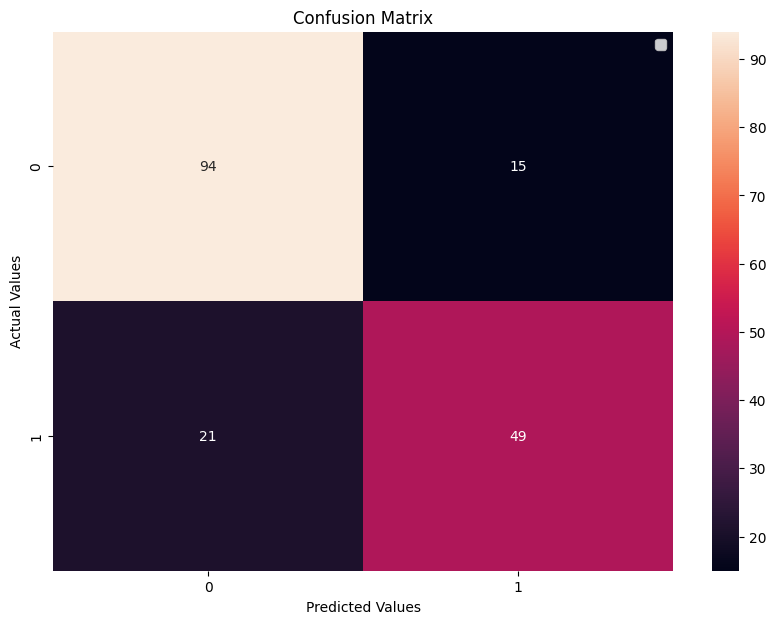

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot= True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend()
plt.show()

### Spam Detection

In [ ]:
spam = pd.read_csv("spam.csv")
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam['spam']= spam['Category'].apply(lambda x : 1 if x=='spam' else 0)
# spam['spam'] = spam['Category'].map({"spam":1, "ham":0})
spam.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
train_x, test_x, train_y, test_y= train_test_split(spam['Category'], spam.spam, test_size= 0.25)


#### Using countvectorizer to vectorize the sentences.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v= CountVectorizer()

In [ ]:
type(train_x)

pandas.core.series.Series

In [ ]:
train_x_values = v.fit_transform(train_x.values)

#### Using Multinomial Bayes .

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()
model.fit(train_x_values, train_y)

MultinomialNB()

In [ ]:
model.score(v.fit_transform(test_x), test_y)

1.0

In [ ]:
model.predict(train_x_values[2])

array([1])

#### Using cross-validation score to visualize the behaviour of the model using during splits of inputs

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(MultinomialNB(), v.fit_transform(spam['Category']),spam.spam, cv= 10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Creating our own data Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
clf= Pipeline([
    ("Vectorizer", CountVectorizer()),
    ("nb", MultinomialNB())
])
clf.fit(train_x, train_y)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
clf.score(test_x, test_y)

1.0

## GridsearchCV
Lets us cross validate a given model for a given set of hyperparameter values.

In [ ]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import load_iris
iris= load_iris()

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma= 'auto'),
                   {
                       "C": [1,10,20],
                       "kernel":["rbf", 'linear']},
                    cv=5, return_train_score = False)
clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00220938, 0.00208764, 0.00167994, 0.00172949, 0.00180187,
        0.00166302]),
 'std_fit_time': array([0.00050642, 0.00043749, 0.00020887, 0.00037994, 0.00015838,
        0.00014465]),
 'mean_score_time': array([0.00128288, 0.00113978, 0.0011282 , 0.00107865, 0.00126438,
        0.00121431]),
 'std_score_time': array([1.81602566e-04, 2.88707475e-05, 1.45545902e-04, 5.40953630e-05,
        1.59210308e-04, 1.43566507e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [ ]:
result_df= pd.DataFrame(clf.cv_results_)
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002209,0.000506,0.001283,0.000182,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.002088,0.000437,0.001140,0.000029,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001680,0.000209,0.001128,0.000146,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.001729,0.000380,0.001079,0.000054,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.001802,0.000158,0.001264,0.000159,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5


In [ ]:
clf.best_score_

0.9800000000000001

In [ ]:
clf.best_params_m

{'C': 1, 'kernel': 'rbf'}

## Randomized Search
Lets us cross validate our model from random values.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs= RandomizedSearchCV(SVC(gamma='auto'),
                       {
                           "C": [1,5,10],
                           "kernel": ["rbf", 'linear']
                       }, cv= 5 , return_train_score= False, n_iter= 2)
rs.fit(iris.data, iris.target)
rs.cv_results_

{'mean_fit_time': array([0.0049336, 0.0015656]),
 'std_fit_time': array([0.00422446, 0.00011488]),
 'mean_score_time': array([0.00146537, 0.00102477]),
 'std_score_time': array([6.91335302e-04, 5.79233313e-05]),
 'param_kernel': masked_array(data=['linear', 'linear'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[5, 1],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear', 'C': 5}, {'kernel': 'linear', 'C': 1}],
 'split0_test_score': array([1.        , 0.96666667]),
 'split1_test_score': array([1., 1.]),
 'split2_test_score': array([0.93333333, 0.96666667]),
 'split3_test_score': array([0.96666667, 0.96666667]),
 'split4_test_score': array([1., 1.]),
 'mean_test_score': array([0.98, 0.98]),
 'std_test_score': array([0.02666667, 0.01632993]),
 'rank_test_score': array([1, 1], dtype=int32)}

In [ ]:
rs_df= pd.DataFrame(rs.cv_results_)
rs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004934,0.004224,0.001465,0.000691,linear,5,"{'kernel': 'linear', 'C': 5}",1.000000,1.0,0.933333,0.966667,1.0,0.98,0.026667,1
1,0.001566,0.000115,0.001025,0.000058,linear,1,"{'kernel': 'linear', 'C': 1}",0.966667,1.0,0.966667,0.966667,1.0,0.98,0.016330,1


In [ ]:
rs.best_score_

0.9800000000000001

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
models= {
    "SVM": {
        "model": SVC(gamma='auto'),
        "params": {
            "C": [x for x in range(50)],
            "kernel": ["rbf",'linear']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [x for x in range(50)]
        }
    },
    "Logistic Regressiom":{
        "model": LogisticRegression(),
        "params": {
            "C": [x for x in range(50)]
        }
    },


}

In [ ]:
results= []
for model_name, mp in models.items():
  clf= GridSearchCV(mp['model'],mp['params'], cv= 5, return_train_score= False )
  clf.fit(iris.data,iris.target)
  results.append({
      "model": model_name,
      "Best Score": clf.best_score_,
      "Best Parameters": clf.best_params_
  })
results

In [ ]:
rs_df= pd.DataFrame(results, columns= ['Model',"Best Scores", "Best Parameters"])

## Principal Component Analysis(PCA)
It involves reducing the dimensionality of a particular problem by analysing the components(features) with the most amount of variance.


In [ ]:
from sklearn.datasets import load_digits
digits= load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
digits.data[0].reshape(-1,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

0


<Figure size 640x480 with 0 Axes>

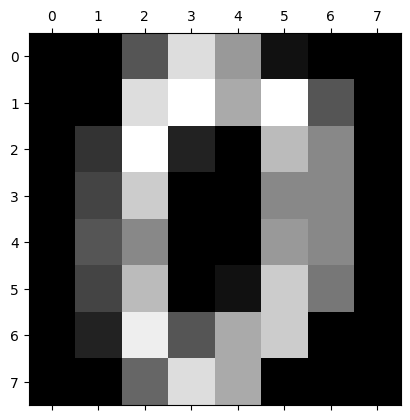

In [ ]:
plt.gray()
plt.matshow(digits.data[0].reshape(-1,8))
print(digits.target[0])

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y= train_test_split(digits.data, digits.target, test_size= 0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 5)


In [ ]:
model.fit(train_x, train_y)

RandomForestClassifier(n_estimators=5)

In [ ]:
model.score(test_x, test_y)

0.9111111111111111

In [ ]:
import pandas as pd
df= pd.DataFrame(digits.data, columns= digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
X= df
Y= digits.target

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)


In [ ]:
# Now Apply PCA
from sklearn.decomposition import PCA
pc= PCA(0.90)
X_scaled_pc= pc.fit_transform(X_scaled)


In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y , test_y = train_test_split(X_scaled_pc, Y , test_size= 0.3 )

In [ ]:
model.fit(train_x, train_y)

RandomForestClassifier(n_estimators=5)

In [ ]:
model.score(test_x, test_y)
# Score is lessser. which means we removed some important Features.

0.8740740740740741

## Ensemble Learning
Bagging:
It does with any model what random forest does with decision tree.
Creates new datasets using Resampling with Replacement technique.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(), digits.data, digits.target, cv=5)

In [ ]:
scores.mean()

0.785235221293717

### Bagging
A Bagging classifier.

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting [1]. If samples are drawn with replacement, then the method is known as Bagging [2]. When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces [3]. Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches [4].

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag= BaggingClassifier(
    estimator= DecisionTreeClassifier(),
    n_estimators= 100,
    max_samples=0.8,
    oob_score= True

)
# When we use resampling with replacement technique, we might miss some elements altogether .. meaning some might not be in the any of the
# bags created. Those elements are called out-of-bag (oob) elements

bag.fit(train_x, train_y)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True)

In [ ]:
bag.oob_score_

0.9228321400159109

In [ ]:
bag.score(test_x, test_y)
# As we can see , the bagged decision tree has very high accuracy comparing to the normal one.

0.9055555555555556

In [ ]:
df['experience']= df['experience'].fillna('zero')